# **1) Find the expected variance E[σ^2] of the “Income” distribution of sample means with size=n of those who are “Married”. Plot the graph**
# of n vs σ. **bold text**
# Consider n=10, 20 , 30....50.**bold text**

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import random
from scipy.stats import norm
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/manishbhnau/Repo/master/Credit.csv"

In [ ]:
#function to calculate sample mean distribution (for iteration number of times)
def sampleMeanDist(df, n, iterate):
	#list to hold mean of many samples, each with size n
	meanDistr=[]
	for i in range(iterate):
		#taking n random numbers in a given range
		randomIndex=random.sample(range(0, df.shape[0]), n)

		#taking n random rows of dataframe ie taking a sample size of n
		dtemp=df[ df.index.isin(randomIndex) ]

		#calculating mean of sample and storing it in result list
		meanDistr.append(np.mean(dtemp["Income"]))

	#assuming its mean is normally distributed finding its mean and standard deviation
	mu, std=norm.fit(meanDistr)
	#printing mean and standard deviation
	print (mu, std)
	#returning mean and standard deviation
	return mu, std

In [ ]:
#Reading dataframe
df=pd.read_csv(url)

#picking rows with given condition in dataframe
df=df[ ( (df["Married"]=="Yes") ) ]

#resetting the indices of dataframe
df=df.reset_index()

In [ ]:
#population parameters
print ("actual mean and variance ", np.mean(df["Income"]), np.std(df["Income"]))

actual mean and variance  46.21708163265304 36.89464580481464


In [ ]:
#Result dataframe to hold values to be plotted
dfRes=pd.DataFrame(columns=["n", "mean", "std"])

#iterate over all sample sizes: each sample size is taken 100 times
for i in [10, 20, 30, 40, 50]:
  #obtaing sample statistics with sample size i and iteration 100 times
  mu, std=sampleMeanDist(df, i, 100)##Number of times a sample size n is repeated for experimentation
  #adding row into result dataframe
  dfRes.loc[len(dfRes)]=[i, mu, std]

44.430775000000004 13.616867526743256
47.1876205 7.1457171821136845
46.021333333333324 6.685052212775404
45.80737824999999 5.038889171711924
46.2657474 4.6548977040005095


      n       mean        std
0  10.0  44.430775  13.616868
1  20.0  47.187621   7.145717
2  30.0  46.021333   6.685052
3  40.0  45.807378   5.038889
4  50.0  46.265747   4.654898


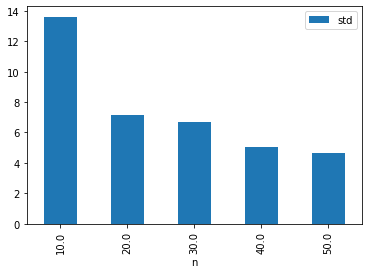

In [ ]:
#Printing result dataframe
print (dfRes)
#Plotting result dataframe
dfRes.plot(x="n", y="std", kind="bar")
plt.show()